# 0. Import packages

First, we import the necessary packages for this exercise.

In [1]:
import xarray as xr 
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
from datetime import datetime, timedelta
import numpy as np
import cartopy.feature as cfeature

# 1. 2-meter temperature

- Open the 2-meter temperature (variable `tas`) data for the `initSFX`-simulation starting at midnight on 1 July 2019 and running for 720 hours: `initSFX_2019070100_720_tas_2019-07-01T01_2019-07-31T00_3600_regridded.nc`
- In what units is the temperature expressed? Convert these units to degrees Celsius (if necessary) for this exercise. This will facilitate the interpretation of results.
- Let's now focus on one location: the Royal Meteorological Institute of Belgium (RMI) in Uccle. Select the temperature data from point in the simulation dataset, which lies closest to the RMI. The coordinates of the RMI are 50.799 N, 4.359 E. The  **Hint**: Look into the `method`-argument of the `sel`-function.
- From 22 until 26 July 2019, we experienced a short, but very intense heat wave in Belgium. Select this period from the data and verify if the conditions for a heat wave are met in the simulation data. The conditions for a heat wave can be found here: [heat wave definition](https://www.meteo.be/nl/info/weerwoorden/hittegolf)

In [105]:
var_name_list = ["hfls", "hfss", "rnetds", "tas", "ts", "mrso", "pr", "tsl1", "tsl2", "mrsol1", "mrsol2", "mrsol3", "mrsfl1", "mrsfl2", "gflux"] # "troad1"
run_name_list = ["initSFX", "initSFXnoTEB"]
ds_list_list = list()

for run_name in run_name_list:
    ds_list = list()

    for var_name in var_name_list:
        ds = xr.open_dataset(f"../data/{run_name}_2019070100_720_{var_name}_2019-07-01T01_2019-07-31T00_3600_regridded.nc", engine="netcdf4")
        ds_list.append(ds)

    ds = xr.merge(ds_list, compat="minimal")
    ds_list_list.append(ds)

ds = xr.concat(ds_list_list, dim="run_name")
ds

<xarray.Dataset>
Dimensions:    (time: 720, lon: 75, lat: 70, run_name: 2, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 2019-07-01T01:00:00 ... 2019-07-31
  * lon        (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.9 6.97 7.04 7.11 7.18
  * lat        (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    time_bnds  (time, bnds) datetime64[ns] 2019-07-01 ... 2019-07-31
    crs        int64 0
    rstart     <U10 '2019070100'
  * run_name   (run_name) <U12 'initSFX' 'initSFXnoTEB'
Dimensions without coordinates: bnds
Data variables: (12/15)
    hfls       (run_name, time, lat, lon) float32 1.587 1.883 ... 0.2914 0.2584
    hfss       (run_name, time, lat, lon) float32 2.34 7.096 ... -23.82 -24.24
    rnetds     (run_name, time, lat, lon) float32 -54.07 -55.14 ... -63.4 -61.19
    tas        (run_name, time, lat, lon) float32 289.8 290.3 ... 295.8 295.9
    ts         (run_name, time, lat, lon) float32 290.1 290.6 ... 295.4 295.4
    mrso       (run_name, time, lat, lon) float32 0.6976 0.629 ... 0.2883 0.3467
    ...         ...
    mrsol1     (run_name, time, lat, lon) float32 0.1597 0.1414 ... 0.07233
    mrsol2     (run_name, time, lat, lon) float32 0.2492 0.2227 ... 0.1228
    mrsol3     (run_name, time, lat, lon) float32 0.2887 0.2648 ... 0.122 0.1515
    mrsfl1     (run_name, time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mrsfl2     (run_name, time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    gflux      (run_name, time, lat, lon) float32 -57.19 -62.55 ... -37.21
Attributes: (12/33)
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    source:                    ALARO-1 (CY43T2) - SURFEX v8.0
    Conventions:               CF-1.11
    activity_id:               DD
    comment:                   
    contact:                   wout.dewettinck@ugent.be
    ...                        ...
    version_realization_info:  
    creation_date:             2024-11-12T10:19:07Z
    frequency:                 1hr
    StartTime:                 2019-07-01T00:00
    EndTime:                   2019-07-31T00:00
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [106]:
def convert_to_Celsius(ds):
    for var_name in ["tas", "ts", "tsl1", "tsl2", "troad1"]:
        if var_name in ds:
            ds[var_name].values = ds[var_name].values - 273.15
            ds[var_name].attrs["units"] = "°C"

    return ds

ds = convert_to_Celsius(ds)
ds

<xarray.Dataset>
Dimensions:    (time: 720, lon: 75, lat: 70, run_name: 2, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 2019-07-01T01:00:00 ... 2019-07-31
  * lon        (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.9 6.97 7.04 7.11 7.18
  * lat        (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    time_bnds  (time, bnds) datetime64[ns] 2019-07-01 ... 2019-07-31
    crs        int64 0
    rstart     <U10 '2019070100'
  * run_name   (run_name) <U12 'initSFX' 'initSFXnoTEB'
Dimensions without coordinates: bnds
Data variables: (12/15)
    hfls       (run_name, time, lat, lon) float32 1.587 1.883 ... 0.2914 0.2584
    hfss       (run_name, time, lat, lon) float32 2.34 7.096 ... -23.82 -24.24
    rnetds     (run_name, time, lat, lon) float32 -54.07 -55.14 ... -63.4 -61.19
    tas        (run_name, time, lat, lon) float32 16.69 17.13 ... 22.68 22.72
    ts         (run_name, time, lat, lon) float32 16.91 17.49 ... 22.22 22.24
    mrso       (run_name, time, lat, lon) float32 0.6976 0.629 ... 0.2883 0.3467
    ...         ...
    mrsol1     (run_name, time, lat, lon) float32 0.1597 0.1414 ... 0.07233
    mrsol2     (run_name, time, lat, lon) float32 0.2492 0.2227 ... 0.1228
    mrsol3     (run_name, time, lat, lon) float32 0.2887 0.2648 ... 0.122 0.1515
    mrsfl1     (run_name, time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mrsfl2     (run_name, time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    gflux      (run_name, time, lat, lon) float32 -57.19 -62.55 ... -37.21
Attributes: (12/33)
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    source:                    ALARO-1 (CY43T2) - SURFEX v8.0
    Conventions:               CF-1.11
    activity_id:               DD
    comment:                   
    contact:                   wout.dewettinck@ugent.be
    ...                        ...
    version_realization_info:  
    creation_date:             2024-11-12T10:19:07Z
    frequency:                 1hr
    StartTime:                 2019-07-01T00:00
    EndTime:                   2019-07-31T00:00
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [107]:
lat_rmi, lon_rmi = 50.799, 4.359
ds_rmi = ds.sel(lon=lon_rmi, lat=lat_rmi, method="nearest")
ds_rmi

<xarray.Dataset>
Dimensions:    (time: 720, run_name: 2, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 2019-07-01T01:00:00 ... 2019-07-31
    lon        float64 4.38
    lat        float64 50.8
    time_bnds  (time, bnds) datetime64[ns] 2019-07-01 ... 2019-07-31
    crs        int64 0
    rstart     <U10 '2019070100'
  * run_name   (run_name) <U12 'initSFX' 'initSFXnoTEB'
Dimensions without coordinates: bnds
Data variables: (12/15)
    hfls       (run_name, time) float32 3.154 2.854 2.877 ... 0.5838 0.7481
    hfss       (run_name, time) float32 10.32 8.763 5.317 ... -12.68 -13.5
    rnetds     (run_name, time) float32 -53.5 -53.28 -51.14 ... -55.66 -54.17
    tas        (run_name, time) float32 16.88 16.61 16.42 ... 17.63 17.41 17.18
    ts         (run_name, time) float32 17.29 16.93 16.6 ... 17.45 17.19 17.02
    mrso       (run_name, time) float32 0.555 0.5562 0.5574 ... 0.5006 0.5016
    ...         ...
    mrsol1     (run_name, time) float32 0.1241 0.1253 0.1265 ... 0.1126 0.1137
    mrsol2     (run_name, time) float32 0.1831 0.1831 0.1831 ... 0.1659 0.1659
    mrsol3     (run_name, time) float32 0.2478 0.2478 0.2478 ... 0.2221 0.2221
    mrsfl1     (run_name, time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    mrsfl2     (run_name, time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    gflux      (run_name, time) float32 -64.68 -62.6 -57.05 ... -43.57 -41.42
Attributes: (12/33)
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    source:                    ALARO-1 (CY43T2) - SURFEX v8.0
    Conventions:               CF-1.11
    activity_id:               DD
    comment:                   
    contact:                   wout.dewettinck@ugent.be
    ...                        ...
    version_realization_info:  
    creation_date:             2024-11-12T10:19:07Z
    frequency:                 1hr
    StartTime:                 2019-07-01T00:00
    EndTime:                   2019-07-31T00:00
    CDO:                       Climate Data Operators version 2.0.6 (https://...

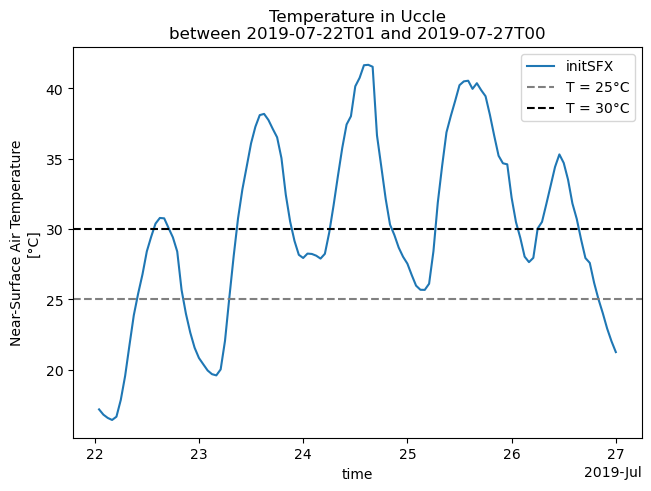

In [96]:
# Change this to period of heat wave
tstart = "2019-07-22T01"
tstop = "2019-07-27T00"
var_name = "tas"
run_name = "initSFX"
ds_rmi_period = ds_rmi.sel(time=slice(tstart, tstop), run_name=run_name)

### Temperatures

fig, ax = plt.subplots(figsize=(6.4, 4.8), layout="constrained")

var = ds_rmi_period[var_name]
long_name = var.attrs["long_name"]
var.plot(ax=ax, x="time", label=run_name)

ax.set_title(f"Temperature in Uccle\nbetween {tstart} and {tstop}")
ax.axhline(25, linestyle="--", color="grey", label="T = 25°C")
ax.axhline(30, linestyle="--", color="black", label="T = 30°C")
ax.legend()

# 2. Energy exchange with the surface

An important variable which influences the state of the atmosphere, and hence the weather, is the interaction with the surface. This interaction can be represented as the exchange of energy in the form of fluxes. We consider three types of energy exchange: radiation, sensible heat flux and latent heat flux. The variable names corresponding to these fluxes are respectively `rnetds`, `hfss` and `hfls`.

- Load in the simulation data of these fluxes.
- What are the units of these fluxes?
- Select again the data from Uccle and from the period between 22 and 26 July 2019. Plot the ernergy fluxes in function of time. 
- We will now determine make sense of the sign of these fluxes:
    - The radiation flux `rnetds` is the net radiation flux: it is the difference between the outgoing and incoming radiation. The incoming radiation is primarily shortwave radiation: either direct (from the Sun) or diffuse (scattered solar radiation). The outgoing radiation is emmited by the surface itself; it is longwave radiation. The difference between these two contributions is the net radiation flux. When is this variable positive and negative? What does this mean: is a positive flux directed into or out of the surface?
    - The sensible heat flux `hfss` is the heat transfer caused by the temperature difference between the surface and the atmosphere. The heat is transfered from the medium with the highest temperature to the medium with the lowest temperature. Compare the near-surface air temperature (`tas`) with the surface temperature (`ts`). Use the difference between `tas` and `ts` to derive the sign of the sensible heat flux.
    - The latent heat flux is caused by the evaporation of soil moisture. This evaporation requires latent heat for the phase transition between the liquid and vapor phase. This heat is extracted from the soil, which causes it to cool. Consider the latent heat flux together with the evaporation flux. At what times are these variables postive/negative? What do you notice about the latent heat flux and how can this be explained? Lastly, in what direction is the postive latent heat flux defined? 

In [161]:
var_name_list = ["hfls", "hfss", "rnetds", "ts", "tas", "gflux"]
run_name_list = ["initSFX"]
ds_list_list = list()

for run_name in run_name_list:
    ds_list = list()

    for var_name in var_name_list:
        ds = xr.open_dataset(f"../data/{run_name}_2019070100_720_{var_name}_2019-07-01T01_2019-07-31T00_3600_regridded.nc", engine="netcdf4")
        ds_list.append(ds)

    ds = xr.merge(ds_list, compat="minimal")
    ds_list_list.append(ds)

ds = xr.concat(ds_list_list, dim="run_name")
ds

<xarray.Dataset>
Dimensions:    (time: 720, lon: 75, lat: 70, run_name: 1, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 2019-07-01T01:00:00 ... 2019-07-31
  * lon        (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.9 6.97 7.04 7.11 7.18
  * lat        (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    time_bnds  (time, bnds) datetime64[ns] 2019-07-01 ... 2019-07-31
    crs        int64 0
    rstart     <U10 '2019070100'
  * run_name   (run_name) <U7 'initSFX'
Dimensions without coordinates: bnds
Data variables:
    hfls       (run_name, time, lat, lon) float32 1.587 1.883 ... 0.6217 0.6988
    hfss       (run_name, time, lat, lon) float32 2.34 7.096 ... -28.26 -28.61
    rnetds     (run_name, time, lat, lon) float32 -54.07 -55.14 ... -67.98
    ts         (run_name, time, lat, lon) float32 290.1 290.6 ... 295.0 294.9
    tas        (run_name, time, lat, lon) float32 289.8 290.3 ... 295.6 295.6
    gflux      (run_name, time, lat, lon) float32 -57.19 -62.55 ... -39.93
Attributes: (12/33)
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    source:                    ALARO-1 (CY43T2) - SURFEX v8.0
    Conventions:               CF-1.11
    activity_id:               DD
    comment:                   
    contact:                   wout.dewettinck@ugent.be
    ...                        ...
    version_realization_info:  
    creation_date:             2024-11-12T10:19:07Z
    frequency:                 1hr
    StartTime:                 2019-07-01T00:00
    EndTime:                   2019-07-31T00:00
    CDO:                       Climate Data Operators version 2.0.6 (https://...

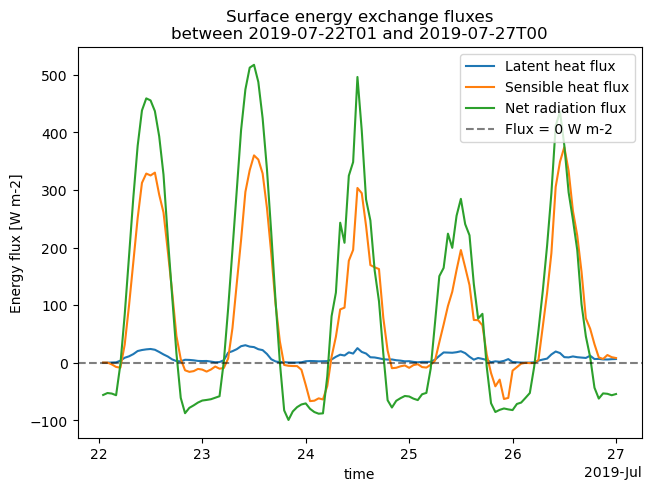

In [104]:
lat_rmi, lon_rmi = 50.799, 4.359
ds_rmi = ds.sel(lon=lon_rmi, lat=lat_rmi, method="nearest")

tstart = "2019-07-22T01"
tstop = "2019-07-27T00"
run_name = "initSFX"
ds_rmi_period = ds_rmi.sel(time=slice(tstart, tstop), run_name=run_name)

fig, ax = plt.subplots(layout="constrained")

ds_rmi_period.hfls.plot(ax=ax, x="time", label="Latent heat flux")
ds_rmi_period.hfss.plot(ax=ax, x="time", label="Sensible heat flux")
ds_rmi_period.rnetds.plot(ax=ax, x="time", label="Net radiation flux")

ax.set_title(f"Surface energy exchange fluxes\nbetween {tstart} and {tstop}")
ax.set_ylabel("Energy flux [W m-2]")

ax.axhline(linestyle="--", color="k", alpha=0.5, label="Flux = 0 W m-2")
ax.legend()

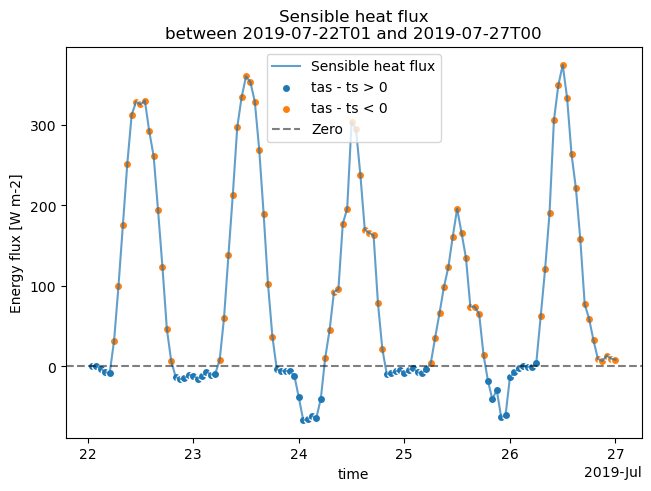

In [160]:
fig, ax = plt.subplots(layout="constrained")

hfss = ds_rmi_period.hfss
temp_diff = (ds_rmi_period.tas - ds_rmi_period.ts)

hfss.plot(ax=ax, x="time", label="Sensible heat flux", alpha=0.7)
hfss.where(temp_diff > 0).plot.scatter(ax=ax, x="time", label="tas - ts > 0")
hfss.where(temp_diff < 0).plot.scatter(ax=ax, x="time", label="tas - ts < 0")

ax.set_title(f"Sensible heat flux\nbetween {tstart} and {tstop}")
ax.set_ylabel("Energy flux [W m-2]")

ax.axhline(linestyle="--", color="k", alpha=0.5, label="Zero")
ax.legend()

plt.show()

Look at the signs of the energy fluxes interacting with the surface. How are the signs defined? Think logically!
Calculate the net ground flux of energy going into the soil.

? Try to calculate heat capacity of the ground. Compare cumulative ground flux with Ts OR derivative of Ts with ground flux.

We plot the fluxes over the period for the baseline configuration. We also plot GFLUX and TG1 and TG2.

# 3. Comparison of simulation without urban areas